In [45]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np

In [46]:
pet_supplies=pd.read_csv('pet_supplies_2212.csv')
pet_supplies.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


DATA VALIDATION



~Deal with Missing values
~check for duplicates
~Check for inconsistencies in data
~Ensure data is in desired format
~check data type



In [47]:
pet_supplies.shape #pet supplies dataset has 1500 rows and 8 columns(product id,sales,category,size,price,rating,repeat_purchase). 
 #The columns can be seen to have no nun values except for ratings. Some columns, although not null, are filled with incorrect data. #
 # Three data type can be found in the dataset. int,object and flat with some columns having to be casted as another.

(1500, 8)

In [48]:
pet_supplies.describe()

,product_id,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1350.000000,1500.000000
mean,750.500000,996.597847,4.991111,0.604000
std,433.157015,323.952676,1.559755,0.489228
min,1.000000,286.940000,1.000000,0.000000
25%,375.750000,747.420000,4.000000,0.000000
50%,750.500000,1000.830000,5.000000,1.000000
75%,1125.250000,1158.157500,6.000000,1.000000
max,1500.000000,2255.960000,9.000000,1.000000


In [49]:
pet_supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


The rating columns contains ratinggs from with values between 1-10. It has 150 null values. These missing values are replaced with 0

In [50]:
#replace missing values in rating since it can be seen that 150 rows are missing
pet_supplies['rating'].fillna(0,inplace=True)


In [51]:

pet_supplies['rating'].value_counts()

5.0    304
6.0    299
4.0    283
3.0    190
0.0    150
7.0    143
8.0     61
2.0     43
9.0     15
1.0     12
Name: rating, dtype: int64

In [52]:
pet_supplies['product_id'].duplicated().any() #product id is just as expected. There are no null values and duplicates. Thee are 1500 product id

False

In [53]:
len(pet_supplies['product_id'].unique())

1500

In [54]:
pet_supplies['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: int64

In [55]:
pet_supplies['size'].isnull().any()

False

In [56]:
pet_supplies['category'].replace('-','unknown',inplace=True)  
#The category column has no missing values. There were 7 categories which did not match with the expected 6 columns. After analysis, it turned out the mistake was the use of '-' to replace unknown category. This was corrected by replacing it with "unknown".
# # After this, the categories included are Equipment,Food,Toys,Medicine,Housing,Accessory,unknown 

In [57]:
t=pet_supplies['category'].value_counts()
pet_supplies['category'].value_counts()


Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
unknown       25
Name: category, dtype: int64

In [58]:
pet_supplies['animal'].value_counts() 
#Animal category are just as expected with four non null categorial columns (cat,fish,dog and bird)

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: int64

In [59]:
pet_supplies['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [60]:
pet_supplies['size']=pet_supplies['size'].apply(lambda x: x.lower()) 
#The size coolumn contained 9 columns which did not match with the expected 3 columns. Further analysis showed that this was due to inconsistencies in size name. To fix this, they were all converted to lower case leaving the column with 3 values(small,medium and large) as expected

In [61]:
pet_supplies['price'].isnull().any()

False

In [62]:
pet_supplies['price'].value_counts()

unlisted    150
22.98        13
28           10
27.97         8
28.03         8
           ... 
40.82         1
18.01         1
22.67         1
13.13         1
33.85         1
Name: price, Length: 707, dtype: int64

In [63]:
pet_supplies['price']=pet_supplies['price'].replace('unlisted',pet_supplies['price'].median())
#The price column had different datat type as against the expected one. Some values were intergers, othes float and some contained the string values "unlisted""
#Values containing unlisted were replaced with the median. The column was then converted to a float data type and finally, rounded to two data place. The result of these matched the expected format

TypeError: 

In [ ]:
#pet_supplies['price']=pet_supplies['price'].fillna(pet_supplies['price'].median())

In [ ]:
pet_supplies['price'].astype(np.float64)

0       51.10
1       35.98
2       31.23
3       24.95
4       26.18
        ...  
1495    40.91
1496    32.89
1497    25.79
1498    19.94
1499    25.95
Name: price, Length: 1500, dtype: float64

In [ ]:
pet_supplies['price']=pd.to_numeric(pet_supplies['price'], errors='coerce') #chage to float64

In [ ]:
pet_supplies['price'].dtype

dtype('float64')

In [ ]:
pet_supplies['price']=pet_supplies['price'].round(2) #round

In [ ]:
pet_supplies['price'].head()

0    51.10
1    35.98
2    31.23
3    24.95
4    26.18
Name: price, dtype: float64

In [ ]:
pet_supplies['sales']=pet_supplies['sales'].round(2)
pet_supplies['sales'].head()
#The sales data type was rounded to 2 decimal places to make it match its expected format

0    1860.62
1     963.60
2     898.30
3     982.15
4     832.63
Name: sales, dtype: float64

In [ ]:
pet_supplies['repeat_purchase'].value_counts()
#the repeat_purchase column had no null vaue and was categorized into 1 nd 0 as expected

1    906
0    594
Name: repeat_purchase, dtype: int64

In [ ]:
pet_supplies['repeat_purchase'].isnull().any()

False

In [ ]:
print(pet_supplies.groupby('category')['repeat_purchase'].sum())

category
-             14
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
Name: repeat_purchase, dtype: int64


In [ ]:
total_repeat_purch=pet_supplies.groupby('category')['repeat_purchase'].sum()

category
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
unknown       14
Name: repeat_purchase, dtype: int64


HOW MANY PRODUCT ARE REPEAT PURCAHSES?

In [ ]:
#Customers tend to have repeat purchases from the store more than those who do not. Out of 1500 urchases,906 of them are repeat purchases
#This represents 60% of the total purchases made in the store. Of these purchases,equipments has the most repeat purchases with 24.4% of total repeat purchases. Equipment is also the most bought category with 370 purchases in total
#When we look at the ratio of total repeat purchases to total purchase ,66.9% of housing buyers come back for a repeat purchase,64.5% of people who bought medicine are repeat purchase and equipment comes in third with 59.7%

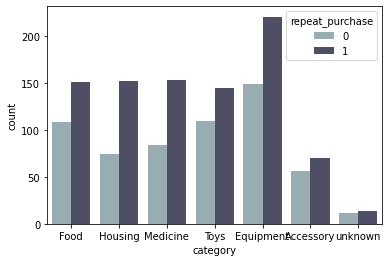

In [ ]:
sns.countplot(x=pet_supplies['category'],data=pet_supplies,hue='repeat_purchase',palette="bone_r")
plt.show()

#add title 

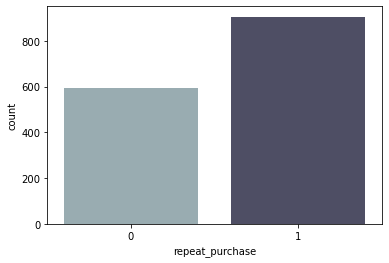

In [ ]:
sns.countplot(data=pet_supplies,x="repeat_purchase",palette="bone_r")
plt.show()

How ae sales distributed across other variables (use multiplot for this)

c:\Users\yfird\Anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


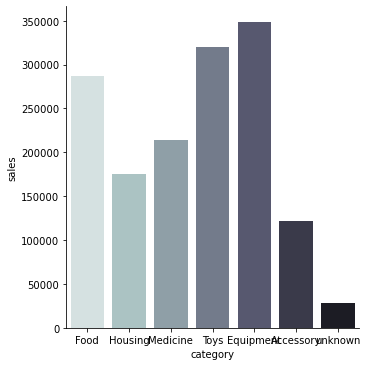

In [100]:
sns.catplot(kind="bar",data=pet_supplies, x='category', y='sales',estimator=sum, ax=axes[0,0],palette="bone_r",ci=None)

Text(0.5, 0.98, 'How is sales affected by other variables?')

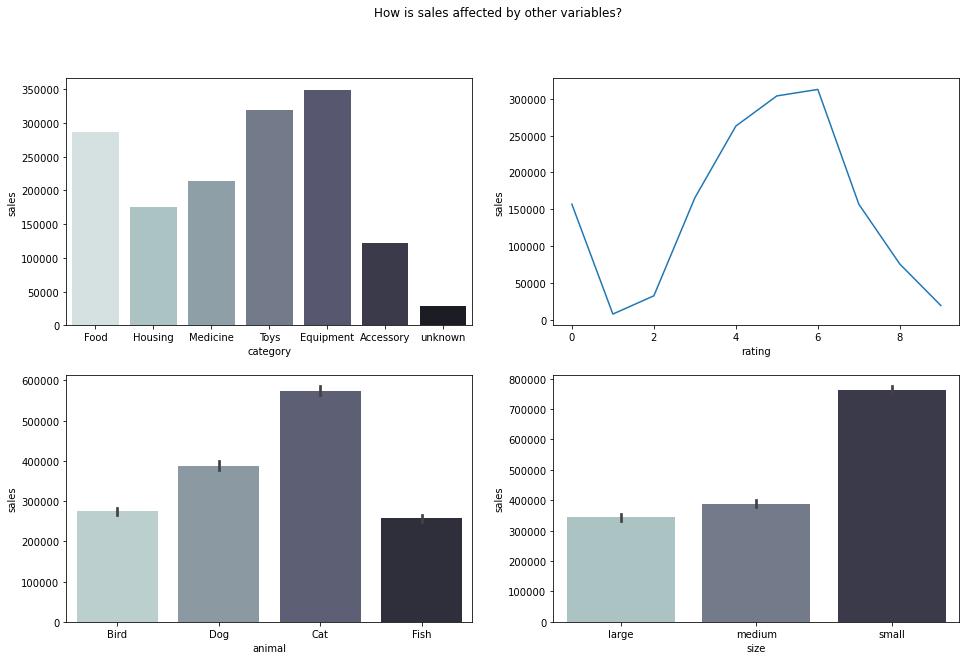

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

#create chart in each subplot
sns.barplot(data=pet_supplies, x='category', y='sales',estimator=sum, ax=axes[0,0],palette="bone_r",ci=None)
sns.lineplot(data=pet_supplies,x=pet_supplies['rating'], y='sales',estimator=sum, ax=axes[0,1],palette="bone_r",ci=None)
sns.barplot(data=pet_supplies, x=pet_supplies['animal'], y='sales',estimator=sum, ax=axes[1,0], palette="bone_r")
sns.barplot( x=pet_supplies['size'], y=pet_supplies['sales'],estimator=sum, ax=axes[1,1],palette="bone_r")
fig.suptitle('How is sales affected by other variables?')
#axes[0].set_title('Title of the first chart')

<AxesSubplot:xlabel='animal'>

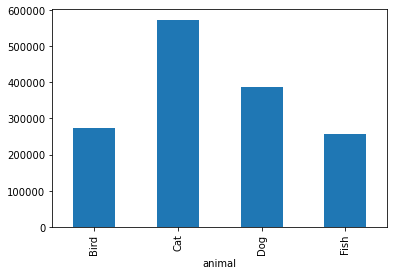

In [89]:
a.plot(kind='bar')

Text(0.5, 1.0, 'sales vs category')

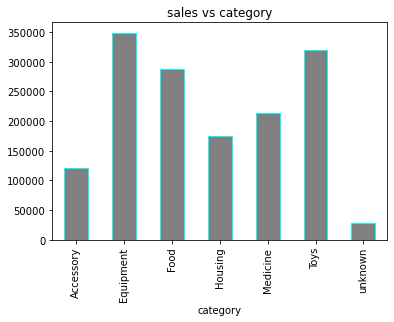

In [98]:
c.plot(kind='bar', color="gray",edgecolor='cyan')
plt.title('sales vs category')

<AxesSubplot:xlabel='size'>

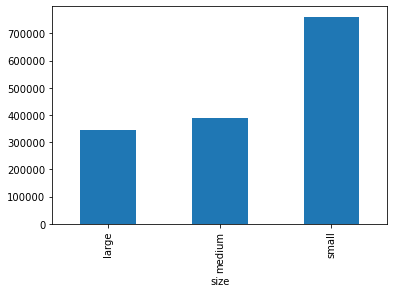

In [92]:
s.plot(kind='bar')

<AxesSubplot:xlabel='rating'>

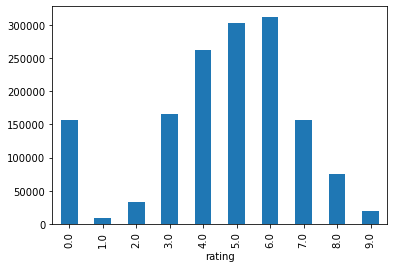

In [93]:
r.plot(kind='bar')

In [ ]:
print(pet_supplies.groupby('animal')['repeat_purchase'].sum())

animal
Bird    111
Cat     344
Dog     208
Fish    243
Name: repeat_purchase, dtype: int64


In [ ]:
print(pet_supplies.groupby('size')['repeat_purchase'].sum())

size
large     150
medium    310
small     446
Name: repeat_purchase, dtype: int64


In [107]:
s

size
large     344648.81
medium    388952.41
small     761295.55
Name: sales, dtype: float64

In [ ]:
print(pet_supplies.groupby('rating')['repeat_purchase'].sum())

rating
0.0     87
1.0     10
2.0     27
3.0    126
4.0    179
5.0    176
6.0    172
7.0     88
8.0     35
9.0      6
Name: repeat_purchase, dtype: int64


In [ ]:
d=pet_supplies.groupby('category')['sales'].sum()
d.sort_values()

category
unknown       28316.27
Accessory    121273.44
Housing      175330.31
Medicine     214066.25
Food         287138.16
Toys         319897.10
Equipment    348875.24
Name: sales, dtype: float64

In [73]:
a=pet_supplies.groupby('animal')['sales'].sum()
s=pet_supplies.groupby('size')['sales'].sum()
c=pet_supplies.groupby('category')['sales'].sum()
r=pet_supplies.groupby('rating')['sales'].sum()

In [103]:
r

rating
0.0    156948.04
1.0      8063.53
2.0     32789.94
3.0    165570.87
4.0    262834.43
5.0    303711.21
6.0    312494.67
7.0    156967.58
8.0     75857.83
9.0     19658.67
Name: sales, dtype: float64

In [105]:
r.sum()

1494896.77

In [ ]:
s=pet_supplies.groupby('size')['sales'].sum().sort_values()

size
large     344648.81
medium    388952.41
small     761295.55
Name: sales, dtype: float64

In [ ]:
s=d.sum()
s="{:,}".format(s)
s

'1,494,896.77'

In [ ]:
print(pet_supplies.groupby('category')['sales'].sum())

category
Accessory    121273.44
Equipment    348875.24
Food         287138.16
Housing      175330.31
Medicine     214066.25
Toys         319897.10
unknown       28316.27
Name: sales, dtype: float64


Text(0.5, 0.98, '')

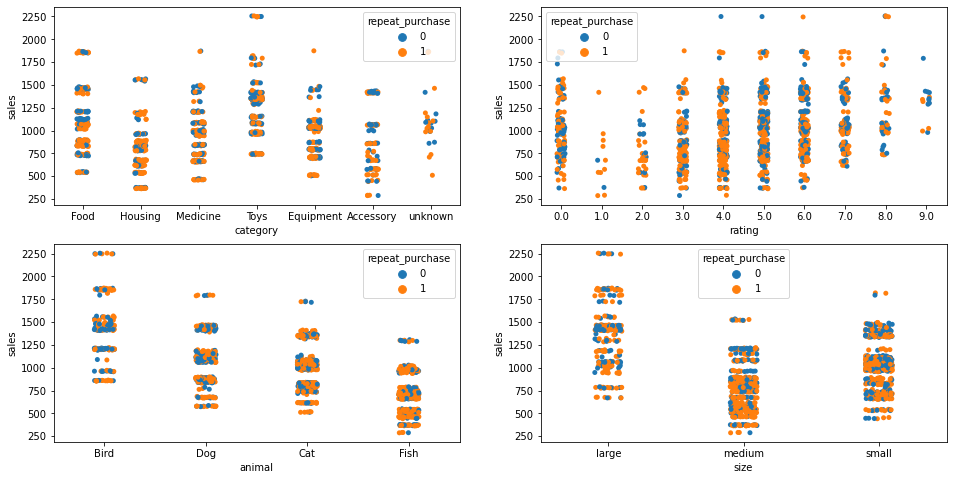

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

#create chart in each subplot
sns.stripplot(data=pet_supplies, x='category', y='sales',hue="repeat_purchase", ax=axes[0,0])
sns.stripplot(data=pet_supplies,x='rating', y='sales',hue="repeat_purchase", ax=axes[0,1])
sns.stripplot(data=pet_supplies, x='animal', y='sales',hue="repeat_purchase", ax=axes[1,0])
sns.stripplot(data=pet_supplies, x='size', y='sales',hue="repeat_purchase",ax=axes[1,1])
fig.suptitle('')

Describe the relationship between repeat purchases and sales(use line plot and scatter plot)

DOES REPEAT PURCHASE IMPACT SALES?

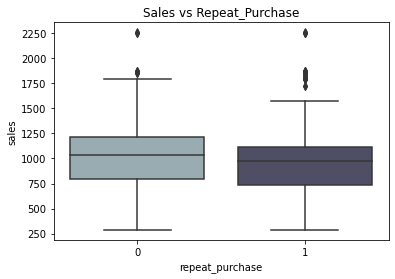

In [ ]:
sns.boxplot(data=pet_supplies, x="repeat_purchase",y="sales",palette="bone_r").set_title('Sales vs Repeat_Purchase')
plt.show()

<AxesSubplot:xlabel='repeat_purchase', ylabel='sales'>

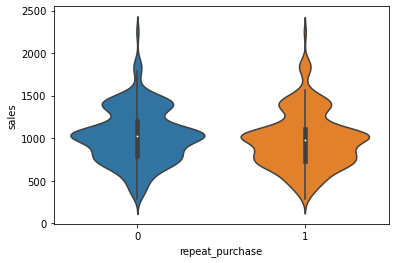

In [108]:
sns.violinplot(data=pet_supplies, x="repeat_purchase",y="sales")

<AxesSubplot:xlabel='repeat_purchase', ylabel='sales'>

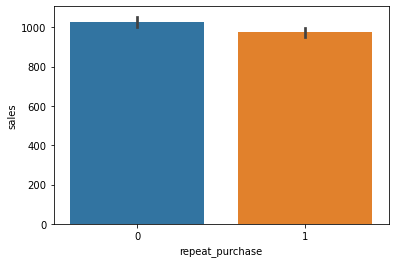

In [109]:
sns.barplot(data=pet_supplies, x="repeat_purchase",y="sales")

Describe the distribution of all of the sales. Your answer must include a visualization
that shows the distribution.

<AxesSubplot:xlabel='sales', ylabel='Count'>

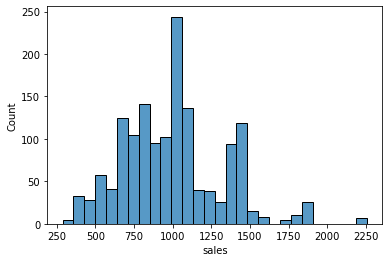

In [ ]:
sns.histplot(data=pet_supplies, x="sales",palette="bone_r")
#if a histogram of the sales data shows a normal distribution, it suggests that the data is symmetric, and that most of the values cluster around the mean

In [ ]:
pet_supplies['sales'].describe()

count    1500.000000
mean      996.597847
std       323.952676
min       286.940000
25%       747.420000
50%      1000.830000
75%      1158.157500
max      2255.960000
Name: sales, dtype: float64

sales
286.94     1
288.01     0
290.77     1
291.19     1
362.05     1
          ..
2248.04    1
2248.63    0
2249.40    0
2254.99    0
2255.96    1
Name: repeat_purchase, Length: 1476, dtype: int64
